# Backpropagation

Backpropagation algorithms are a family of methods used to efficiently train artificial neural networks (ANNs) following a gradient-based optimization algorithm that exploits the chain rule. The main feature of backpropagation is its iterative, recursive and efficient method for calculating the weights updates to improve the network until it is able to perform the task for which it is being trained.

## 1. Cost Function of neural network
Firstly, cost function of nerual network will be introduced. Assuming that our network is designed to do the classification task. In order to make the cost function easier to understand, the following terms would be explained.
* Training dataset: $\{(x^{(1)}, y^{(1)}), ..., (x^{(m)}, y^{(m)})\}$. $(x^{(i)}, y^{(i)})$ is the $i$th data sample in training set and $m$ is the number of data sample in training dataset.
* The dimension of label $y$ is $K$ , e,g. $y^{i} \in \mathbb{R}^{K}$, and the output of neural network $h_{\theta}(x)$ also has the same dimension, e.g. $h_{\theta}(x) \in \mathbb{R}^{K}$. 
* $(h_{\theta}(x))_{k}$ is the $k$th output of neural network and $y_k^{(i)}$ is the $k$th element of label at the $i$th data sample.  
* $L$ is the number of layers in the network and $l$ is the layer index.
* $S_{l}$ is the number of neurons at the layer $l$. $\Theta^{(l)}_{ji}$ is the weight from $i$th neuron at layer $l$ to the $j$th neuron at layer $l+1$.

The cost function: $$J(\Theta) = - \frac{1}{m} [ \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} log (h_{\Theta}(x^{(i)}))_{k} + (1-y_k^{(i)}) log (1 - (h_{\Theta}(x^{(i)}))_{k}) ] + \frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{S_l} \sum_{j=1}^{S_{l+1}} (\Theta^{(l)}_{ji})^2$$

We could see that the first part of that is similar to cost function of logistic regression, and the second part is the regularization term.

## 2. Gradient Computation

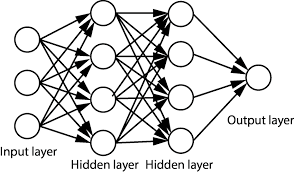

In [3]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/back_propagation1.png", width=600, height=600 )

We difine the index of input layer as 1. Two hidden layres have index 2 and 3 respectively and the index of output layer is 4. The forward propagation could be described using following formulas:
$$a^{(1)} = x$$
$$z^{(2)} = \Theta^{(1)} a^{(1)}, \ a^{(2)} = g(z^{(2)}) + a_0^{(2)}$$
$$z^{(3)} = \Theta^{(2)} a^{(2)}, \ a^{(3)} = g(z^{(3)}) + a_0^{(3)}$$
$$z^{(4)} = \Theta^{(3)} a^{(3)}, \ a^{(4)} = h_{\Theta} (x) = g(z^{(3)})$$

Here $z^{(l)}$ is the input of layer $l$. $a^{(l)}$ is the activation of layer $l$ and $a^{(l)}_0$ is the bias. 

We could find that in forward propagation, what we propagate is the activation $a^{(l)}$. In backpropagation, we need to propagate error term backwards. $\delta^{(l)}_{j}$ is the error of node $j$ in layer $l$. The back propagation could be described using following equations ($L$ = 4): 
$$\delta^{(4)} = a^{(4)} - y$$
$$\delta^{(3)} = (\Theta^{(3)})^T \delta^{(4)} .* g'(z_{(3)})$$
$$\delta^{(2)} = (\Theta^{(2)})^T \delta^{(3)} .* g'(z_{(2)})$$
The backpropagation is just until the layer 2, since the first layer is input layer and we just take input $x$ as the activation. There are no error at the first layer. Given the error term $\delta^{(l)}_{j}$, then the gradient could be calculated.
$$\frac{\partial}{\partial \Theta_{ij}^{(l)}}J(\Theta) = a^{(l)}_{j} \delta^{(l+1)}_{i}$$

## 3. Backpropagation algorithm

We have training set ${(x^{(1)}, y^{(1)}), ..., (x^{(m)}, y^{(m)})}$.  
Set "error matrix" $\Delta^{(l)}_{i,j} = 0$.  
For $i$ = 1 to $m$:
1. set $a^{(1)} = x^{(i)}$
2. perform foreard propagation to compute $a^{(l)}$ for $l = 2,3, ..., L$
3. use $y^{(i)}$ to compute $\delta^{(l)} = a^{(L)} - y^{(i)}$
4. compute $\delta^{(L-1)}, ..., \delta^{(2)}$
5.  $\Delta^{(l)}_{ij} = \Delta^{(l)}_{ij} + a^{(l)}_j \delta^{(l+1)}_{i}$

then we could calculate gradients: $\frac{\partial}{\partial \Theta_{ij}^{(l)}}J(\Theta) = D^{(l)}_{ij}$, where 
$$D^{l}_{ij} = \begin{cases} \frac{1}{m} \Delta ^{(l)}_{ij} + \lambda \Theta^{(l)}_{ij} \ \ \text{if} \ \ j \ne 0  \\   \frac{1}{m} \Delta ^{(l)}_{ij} \ \ \ \ \ \ \text{if} \ \ \  j = 0 \end{cases}$$
Here, $j = 0$ means that $a_0^{(l)}$ is the bias, so we should not give it a regularization term.

## 4. Gradient descent optimization algorithms
From above, we have learned how to use backpropagation alogrithm to calculate the gradint descent and in this part gradient descent optimization algorithms would be introduced. Before that, in order to illustrate these algorithms more clearly, we just  make such assumptions:
* Training dataset: $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)})\}$
* Cost function based on the whole training set is defined as $J_{train}(\Theta)$, $J_{train}(\Theta) = \sum_{i=1}^{m} cost(\Theta, (x^{(i)}, y^{(i)}))$
* $cost(\Theta, (x^{(i)}, y^{(i)}))$ is the cost function based on a single data example.

### 4.1 Batch gradient descent


Batch gradient descent computes the gradient of the cost function w.r.t. to the parameters $\theta$ for the entire training dataset. One time update could be used to following equation and $\alpha$ is the learning rate:
$$\Theta := \Theta - \alpha \frac{\partial}{\partial \Theta} J_{train} (\Theta) $$
we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory. Batch gradient descent also doesn't allow us to update our model online, i.e. with new examples on-the-fly.

### 4.2 Stohastic gradient descent

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$:
* Firstly shuffle the dataset randomly.
* Repeat the following update until convergence:  
  * for $i = 1,2, ...m$: $\ \ \ \Theta := \Theta - \alpha \frac{\partial}{\partial \Theta} cost (\Theta, (x^{(i)}, y^{(i)})) $

Batch gradient descent performs redundant computations for large datasets, as it recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online.

### 4.3 Mini Batch gradient descent

Batch gradient descent updates parameters every time based on the whole data set and stohastic gradient descent only calculate gradient descent according to single data sample. Mini batch gradient descent will seperate training data set into several mini batches and every time use one mini batch to update parameters. Assuming that the size of training set is $m$ and the size of mini batch is $b$. Parameter update could be represented like following:
$$\Theta := \Theta - \alpha \frac{1}{b} \sum_{mini\ batch} \frac{\partial}{\partial \Theta} cost(\Theta, (x^{(i)}, y^{(i)})) $$

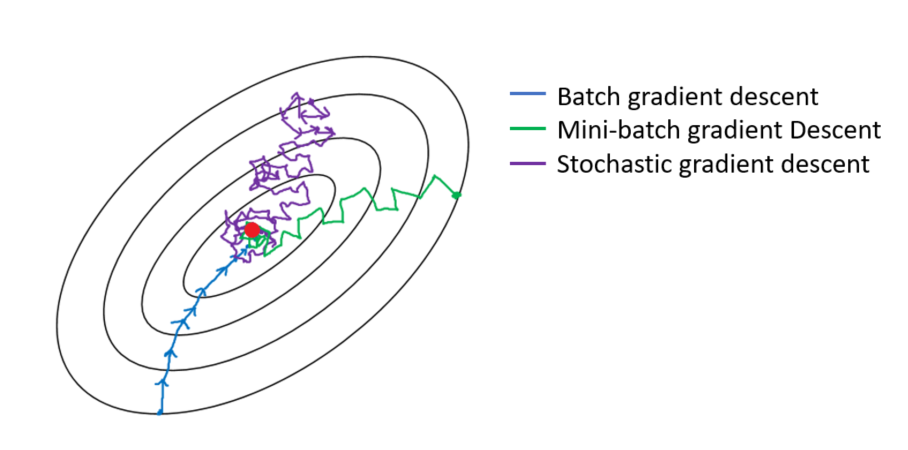

In [4]:
from IPython.display import Image
Image(filename="D:/Jupyter_space/mini_batch_gd.png", width=600, height=600 )

Form the above figure, we could find that batch gradient descent is able to coverge more smoothly since every update all of the data have been token into consideration. Batch gradient descent could find more accurate directions when updating parameters. However, stochastic gradient descent update parameter only according to a single data sample, so the converging path of that includes more randomness. Mini-batch gradient descent trades off between the mount of calculation of very parameter update and the coverging accuraccy.

### 4.4 Momentum

Momentum is a method that helps in the relevant direction and dampens oscillations. It does this by adding a fraction γ of the update vector of the past time step to the current update vector. The algorithm could be described using following steps:
1. initialize $v_t$, $v_1 = \nabla_{\theta} J(\theta)$
2. Parameter update.
   * repeat following execution until convergence: $$v_t = \gamma v_{t-1}+  \eta \nabla_{\theta} J(\theta)$$ 
   $$\theta = \theta - v_t$$
   
Here, every time we use momentum term $v_t$ to update parameter $\theta$ and $v_t$ dose not only depend on current gradient, but also gradients in the history. The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

### 4.5 Adam

Adam uses the squared gradients to scale the learning rate and it takes advantage of momentum by using moving average of the gradient.

The gradient of cost function could be regarded as a random variable, since every time it is only evaluated on small batch of data. $m_t$ is the mean and $v_t$ is uncentered variance. Both of the two terms are calculated using moving average.
$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$  
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$

$g_t$ is the gradient of cost function and after that we need do bias correction to $v_t$ and $m_t$.
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1-\beta_2^t}$$

The parameter update should be like:
$$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon}$$